In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [30]:
tr_data = pd.read_csv('train.csv')
te_data = pd.read_csv('test.csv')


In [3]:
tr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
tr_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Middle
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Middle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Middle


In [25]:
tr_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
tr_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

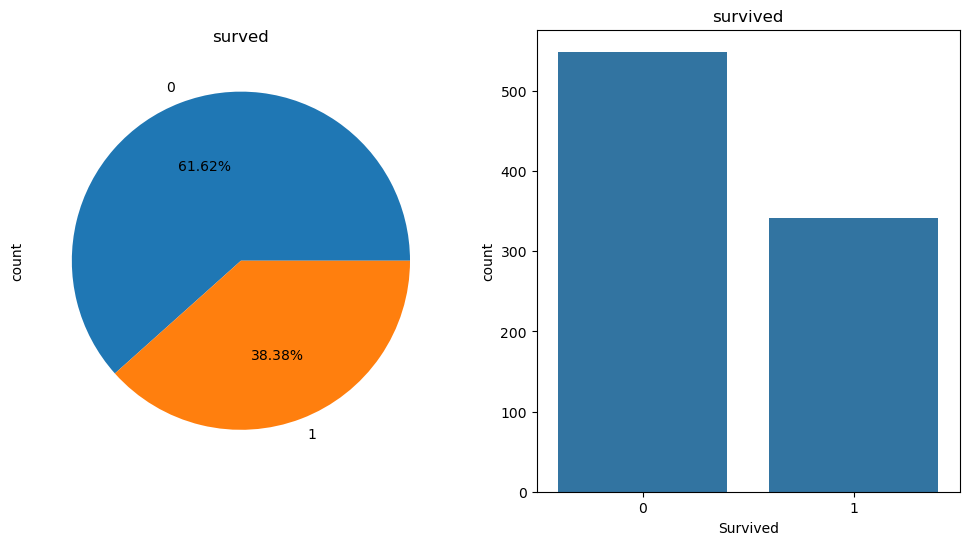

In [6]:
# plt.figure(figsize=(6,6))
# tr_data['Survived'].value_counts().plot.pie(autopct ='%.2f%%')
# plt.title('Surved')
# plt.show()

fig,ax = plt.subplots(1,2,figsize=(12,6))
tr_data['Survived'].value_counts().plot.pie(autopct ='%.2f%%',ax=ax[0])
ax[0].set_title('surved')
sns.countplot(x=tr_data['Survived'], ax=ax[1])
ax[1].set_title('survived')
plt.show()

In [7]:
tr_data.groupby(['Sex','Survived']).size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

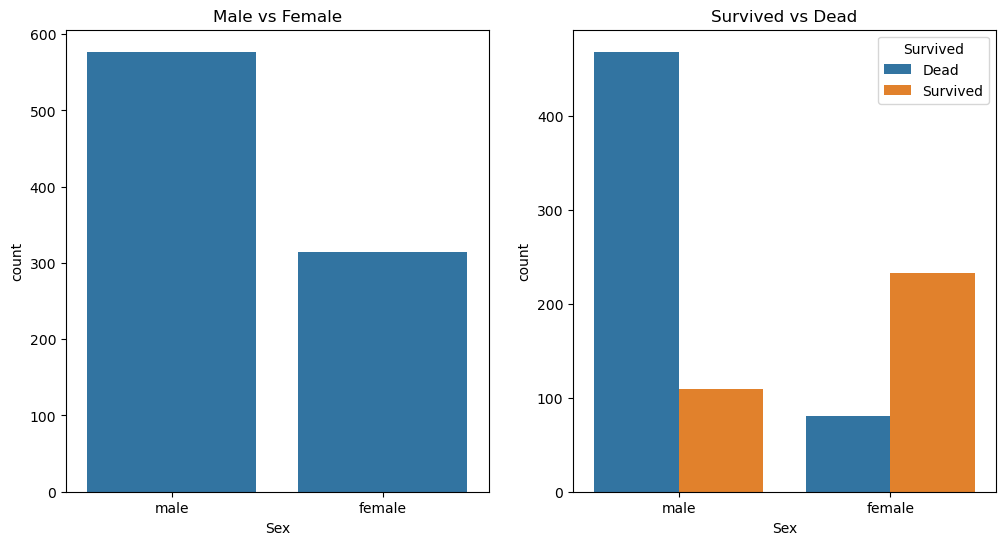

In [8]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
sns.countplot(x=tr_data['Sex'], ax=ax[0])
ax[0].set_title('Male vs Female')


sns.countplot(x=tr_data['Sex'], hue=tr_data['Survived'], ax=ax[1])
plt.legend(['Dead', 'Survived'], title='Survived')
ax[1].set_title('Survived vs Dead')
plt.show()

In [9]:
tr_data.groupby(['Pclass','Survived']).size().reset_index(name='Count')

,Pclass,Survived,Count
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


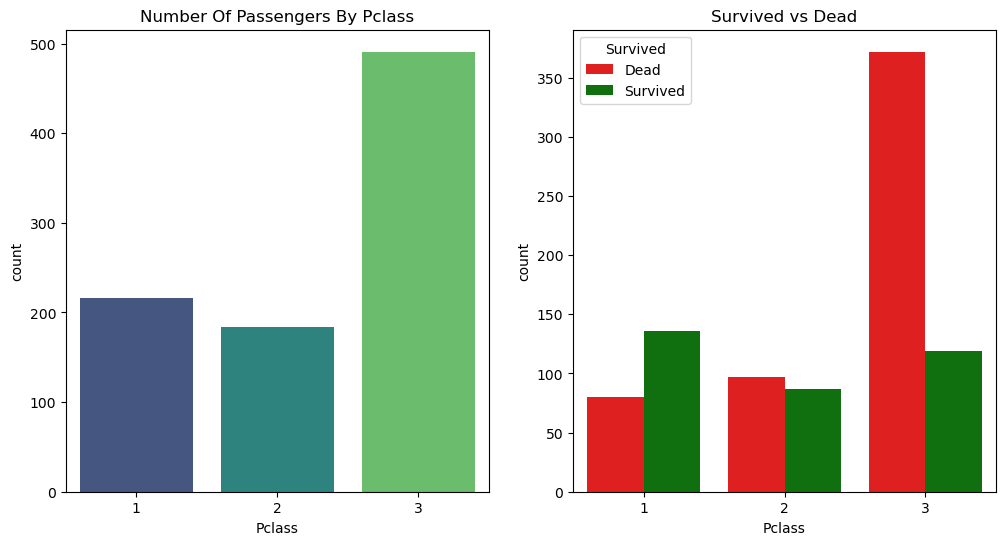

In [10]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
sns.countplot(x=tr_data['Pclass'], ax=ax[0], palette='viridis')
ax[0].set_title('Number Of Passengers By Pclass')


sns.countplot(x=tr_data['Pclass'], hue=tr_data['Survived'], ax=ax[1], palette=['red', 'green'])
plt.legend(['Dead', 'Survived'], title='Survived')
ax[1].set_title('Survived vs Dead')
plt.show()

In [11]:
tr_data.groupby(['Sex', 'Age','Survived']).size().reset_index(name='Count')

,Sex,Age,Survived,Count
0,female,0.75,1,2
1,female,1.00,1,2
2,female,2.00,0,4
3,female,2.00,1,2
4,female,3.00,0,1
...,...,...,...,...
211,male,70.00,0,2
212,male,70.50,0,1
213,male,71.00,0,2
214,male,74.00,0,1


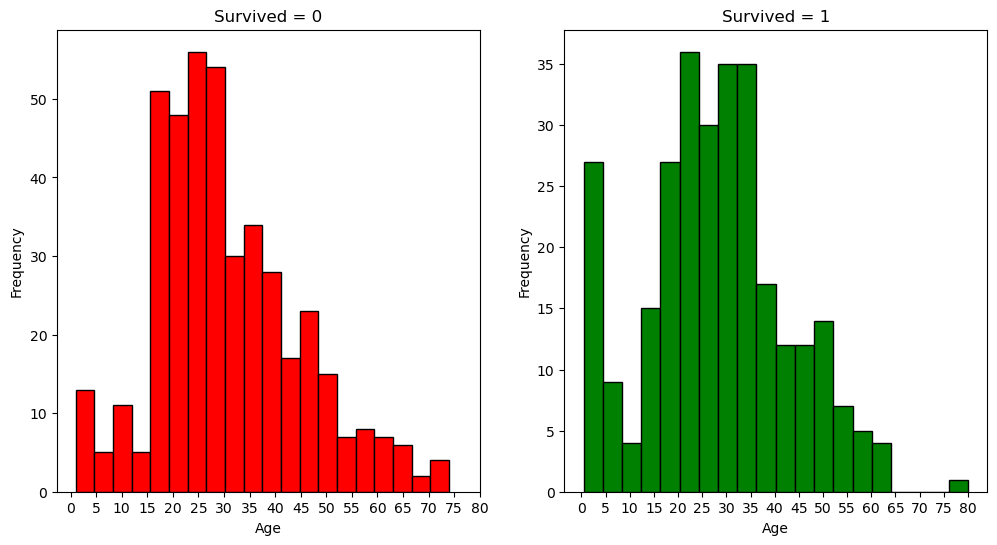

In [12]:
fig,ax=plt.subplots(1,2, figsize=(12,6))

tr_data[tr_data['Survived'] == 0]['Age'].plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

# Plot histogram for survivors
tr_data[tr_data['Survived'] == 1]['Age'].plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived = 1')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Frequency')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)

plt.show()


In [13]:
tr_data['Age_group']=0
tr_data.loc[tr_data['Age']<=16, 'Age_group']='Child'
tr_data.loc[(tr_data['Age']>16)&(tr_data['Age']<=32), 'Age_group'] = 'Young'
tr_data.loc[(tr_data['Age']>32)&(tr_data['Age']<=48), 'Age_group'] = 'Middle'
tr_data.loc[(tr_data['Age']>48)&(tr_data['Age']<=64), 'Age_group'] = 'Old'
tr_data.loc[tr_data['Age']>64,'Age_group'] = 'Upper Old'

In [14]:
tr_data['Age_group'].value_counts().reset_index(name='Count')

,Age_group,Count
0,Young,346
1,Middle,188
2,0,177
3,Child,100
4,Old,69
5,Upper Old,11


In [15]:
tr_data.groupby(['Age_group'])['Survived'].sum().reset_index(name='Sum')

,Age_group,Sum
0,0,52
1,Child,55
2,Middle,76
3,Old,30
4,Upper Old,1
5,Young,128


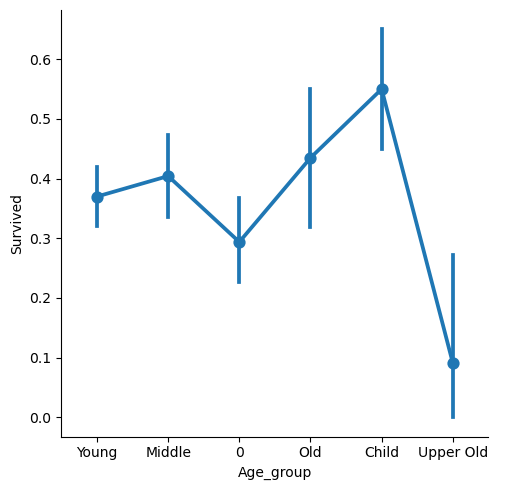

In [16]:
# sns.countplot(x=tr_data['Sex'], ax=ax[0])
sns.catplot(x=tr_data['Age_group'], y=tr_data['Survived'], kind='point')
plt.show()

In [17]:
tr_data.groupby(['Pclass','Age','Survived']).size().reset_index(name='Count')

,Pclass,Age,Survived,Count
0,1,0.92,1,1
1,1,2.00,0,1
2,1,4.00,1,1
3,1,11.00,1,1
4,1,14.00,1,1
...,...,...,...,...
259,3,61.00,0,1
260,3,63.00,1,1
261,3,65.00,0,1
262,3,70.50,0,1


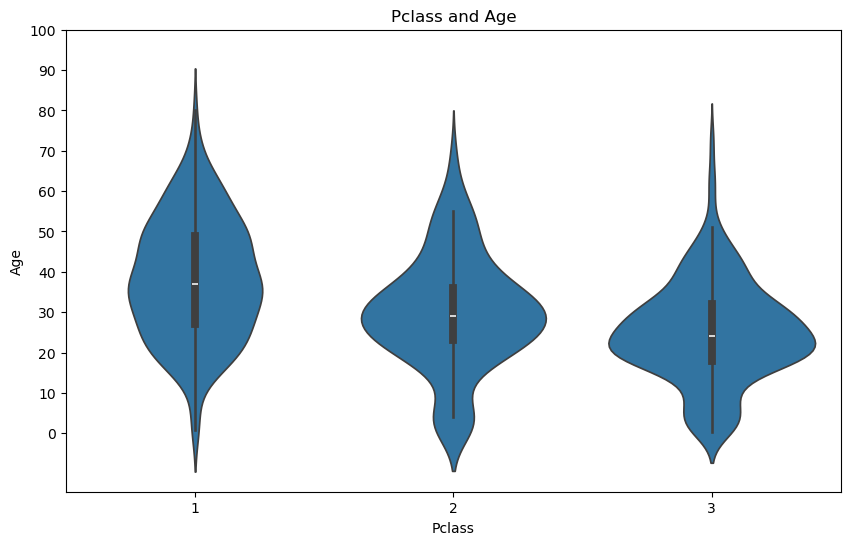

In [18]:
fig,ax=plt.subplots(figsize=(10,6))
sns.violinplot(x=tr_data['Pclass'],y=tr_data['Age'],ax=ax)
ax.set_title('Pclass and Age')
ax.set_yticks(range(0,110,10))
plt.show()

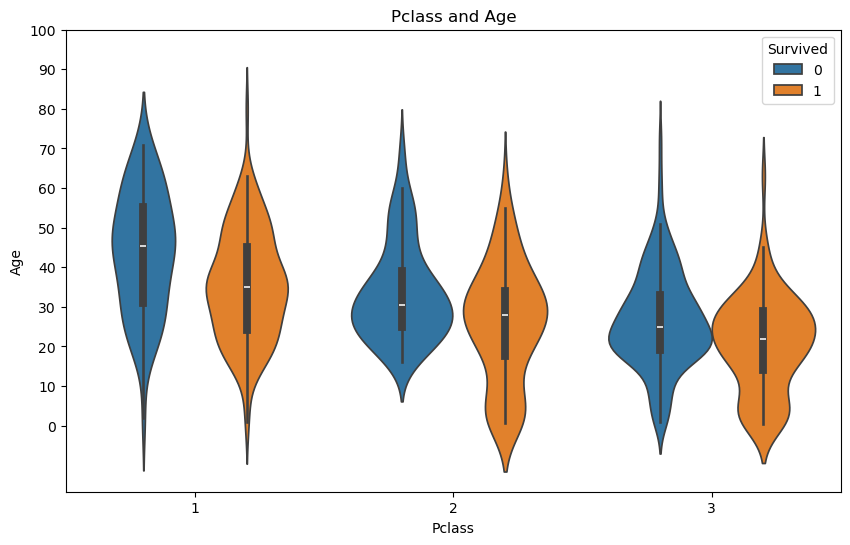

In [19]:
fig,ax=plt.subplots(figsize=(10,6))
sns.violinplot(x=tr_data['Pclass'],y=tr_data['Age'], hue=tr_data['Survived'],ax=ax)
ax.set_title('Pclass and Age')
ax.set_yticks(range(0,110,10))
plt.show()

In [20]:
tr_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

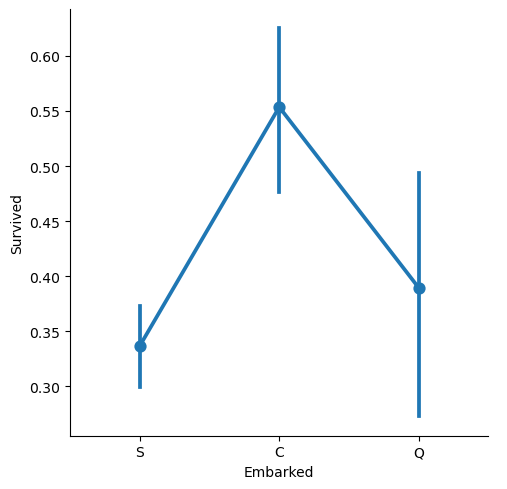

In [21]:
sns.catplot(x=tr_data['Embarked'],y=tr_data['Survived'],kind='point',ax=ax)
plt.show()

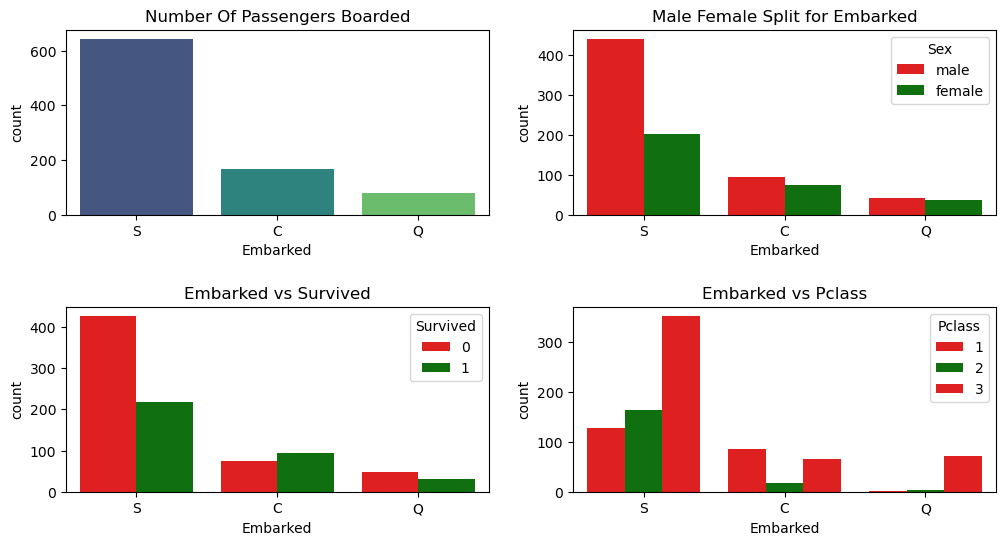

In [31]:
fig,ax = plt.subplots(2,2,figsize=(12,6))
sns.countplot(x=tr_data['Embarked'], ax=ax[0,0], palette='viridis')
ax[0,0].set_title('Number Of Passengers Boarded')


sns.countplot(x=tr_data['Embarked'], hue=tr_data['Sex'], ax=ax[0,1], palette=['red', 'green'])
plt.legend(['Male', 'Female'], title='Sex')
ax[0,1].set_title('Male Female Split for Embarked')

sns.countplot(x=tr_data['Embarked'], hue=tr_data['Survived'], ax=ax[1,0], palette=['red', 'green'])
plt.legend(['Embarked', 'Survived'], title='Sex')
ax[1,0].set_title('Embarked vs Survived')

sns.countplot(x=tr_data['Embarked'], hue=tr_data['Pclass'], ax=ax[1,1], palette=['red', 'green'])
plt.legend(['1', '2', '3'], title='Pclass')
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()